# Texascale X30 convective boundary analysis

In [1]:
%pylab ipympl
import os,sys
from multiprocessing import Pool
from tqdm import tqdm

sys.path.insert(0,'/home/user/user/niagara_scratch_sblouin/PyPPM')
#sys.path.insert(0,'/home/user/user/scratch14_ppmstar-lcse/sblouin/PyPPM')
from ppmpy import ppm

# named tuple for using rprofs and momsdata
# moms data are almost always used alongside rprof data and therefore it is recommended 
# to create a convenient dictionary that will hold the rprof and moms instance 
import collections
hydro = collections.namedtuple('hydro', ['moms','rprof'])

# turn off matplotlib messages
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

from nugridpy import mesa as ms
from nugridpy import utils as ut
import scipy
from scipy.optimize import curve_fit

# astronomical and physical constants in SI and sgs units
from astropy import constants as const
from astropy import units as u

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_dir = '/home/user/user/frontera_scratch3_mao1/'
run = 'X30-NEW'
rprof_dir = os.path.join(data_dir,run,'prfs')
X30 = ppm.RprofSet(rprof_dir)
X30h = X30.get_history()

701 rprof files found in '/home/user/user/frontera_scratch3_mao1/X30-NEW/prfs/.
Dump numbers range from 0 to 700.


## Gradients time evolution

In [3]:
matplotlib.rcParams.update({'font.size': 12})

Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 

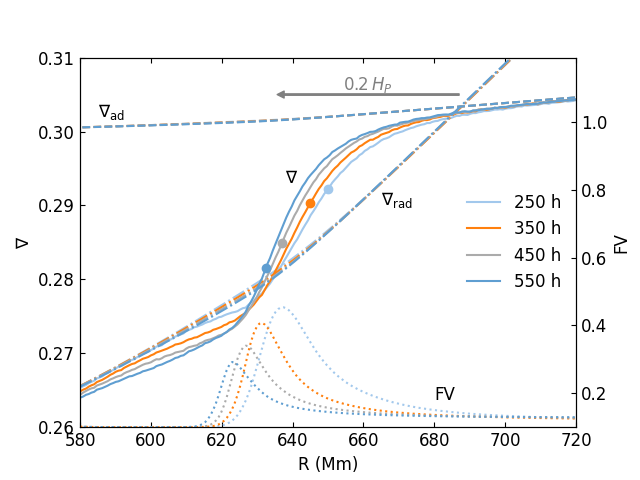

In [4]:
close(5);figure(5)
Hp_R_eval = 687
ax1 = gca()
ax2 = twinx()
for i,h in enumerate([250,350,450,550]):
    sec = h*3600
    R = X30.get('R', fname=sec, num_type='t')
    #
    nablaT = X30.compute_nabla_T(fname=sec, num_type='t')
    ax1.plot(R, nablaT, ut.linestyle(0)[0], color=ut.linestylecb(i)[2],marker='', label=str(h)+' h')
    nablaTad = X30.compute_nabla_T_ad(fname=sec, num_type='t')
    ax1.plot(R, nablaTad, ut.linestyle(1)[0], color=ut.linestylecb(i)[2], markevery=1000)
    nablaTrad = X30.compute_nabla_T_rad(fname=sec, num_type='t')
    ax1.plot(R, nablaTrad, ut.linestyle(2)[0], color=ut.linestylecb(i)[2], markevery=1000)
    #
    FV = X30.get('FV',fname=sec, num_type='t')
    ax2.plot(R,FV, ut.linestyle(3)[0], color=ut.linestylecb(i)[2], markevery=1000)
    #
    dump = int(interp(sec, X30h.get('time(secs)'), X30h.get('NDump')))
    cp = X30.bound_rad(cycles=dump,r_min=200,r_max=800,var='|Ut|',criterion='max_grad') 
    ax1.plot(cp, interp(cp,R[::-1],nablaT[::-1]), 'o', color=ut.linestylecb(i)[2])
    
Hp = X30.compute_Hp(fname=sec, num_type='t')
Hpv = interp(Hp_R_eval, R[::-1], Hp[::-1])
ax1.annotate('', xy=(Hp_R_eval-Hpv*0.2, .305), xytext=(Hp_R_eval, .305), 
            arrowprops=dict(facecolor='grey', 
                            edgecolor='grey', width=1, headwidth=5, headlength=5),)
ax1.text(Hp_R_eval-0.1*Hpv, .305, r'$0.2\,H_P$', color='grey', ha='center',va='bottom')
ax1.set_xlim(580,720)
ax2.set_ylim(0.1,1.19)
ax1.set_ylim(0.26,0.31)
ax1.legend(frameon=False,loc=7)
ax1.text(585,0.302,r'$\nabla_{\rm ad}$')
ax1.text(638,0.293,r'$\nabla$')
ax1.text(665,0.29,r'$\nabla_{\rm rad}$')
ax2.text(680,0.18,'FV')
ax1.set_xlabel('R (Mm)')
ax1.set_ylabel(r'$\nabla$')
ax1.tick_params(axis='both',direction='in')
ax2.tick_params(axis='both',direction='in')
#ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax2.set_ylabel('FV')
savefig('X30_penetration.pdf', bbox_inches='tight')

Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 min is the closest to t = 15000.00 min.
Dump 317 at t = 14985.35 

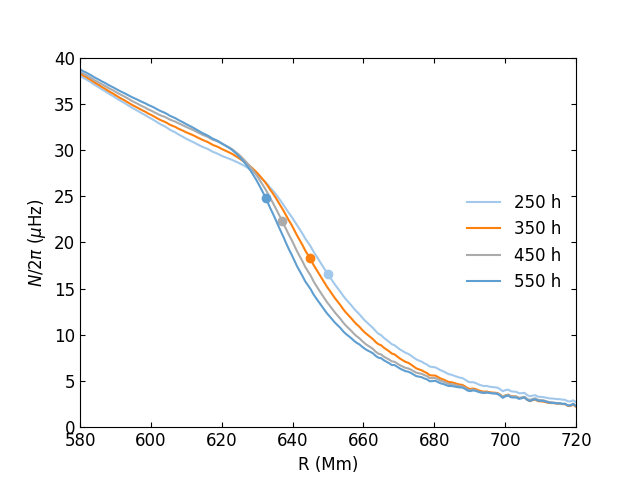

In [25]:
close(6);figure(6)
Hp_R_eval = 687
for i,h in enumerate([250,350,450,550]):
    sec = h*3600
    R = X30.get('R', fname=sec, num_type='t')
    #
    N2 = X30.compute_N2(fname=sec, num_type='t')
    N = 1e6*sqrt(abs(N2))/2/np.pi
    plot(R, N, ut.linestyle(0)[0], color=ut.linestylecb(i)[2],marker='', label=str(h)+' h')
    #
    dump = int(interp(sec, X30h.get('time(secs)'), X30h.get('NDump')))
    cp = X30.bound_rad(cycles=dump,r_min=200,r_max=800,var='|Ut|',criterion='max_grad') 
    plot(cp, interp(cp,R[::-1],N[::-1]), 'o', color=ut.linestylecb(i)[2])
    
ylim(0,40)
xlim(580,720)
legend(frameon=False,loc=7)
ax1 = gca()
ax1.tick_params(axis='both',direction='in')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
xlabel('R (Mm)')
ylabel('$N/2\pi$ ($\mu$Hz)')
savefig('X30_N_penetration.pdf',bbox_inches='tight')

In [13]:
N

array([5.83824111e-01, 1.88152564e-01, 4.27669137e+01, ...,
       3.63010883e+03, 1.55641015e+04, 6.07459112e+04])